<a href="https://colab.research.google.com/github/fernanda0402/Big-Data-Astro/blob/main/Projeto_Iminuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refazendo o exemplo dado em https://indico.cern.ch/event/833895/contributions/3577808/attachments/1927550/3191336/iminuit_intro.html .

In [1]:
# !pip install iminuit matplotlib numpy
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["font.size"] = 20
import numpy as np
!pip3 install iminuit

     |████████████████████████████████| 334 kB 8.2 MB/s 


Exemplo: Vamos usar um modelo de função linear

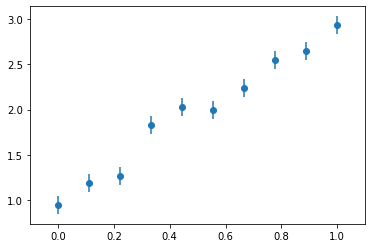

In [2]:
# let's make a line model
def line(x, a, b):
    return a + (x * b)

a_true = 1.0
b_true = 2.0

# let's make some data
x = np.linspace(0, 1, 10)

# precomputed random numbers from standard normal distribution
z = np.array([-0.49783783, -0.33041722, -1.71800806,  1.60229399,
                 1.36682387, -1.15424221, -0.91425267, -0.03395604,
                 -1.27611719, -0.7004073 ])

sigma_y = 0.1 * np.ones_like(x)
y = line(x, a_true, b_true) + sigma_y * z

plt.errorbar(x, y, sigma_y, fmt="o")
plt.xlim(-0.1, 1.1);

*   Estimar os valores dos parâmetros (a,b) a partir dos dados;
*   Precisamos de um valor mínimo para o qual o modelo melhor concorda com os dados: método dos mínimos quadrados ou método da máxima likelihood;
*   O MINUIT sempre minimiza;
*   Usar o IMINUIT para minimizar numericamente como função dos parâmetros do modelo.





In [3]:
# least-squares score function = sum of data residuals squared
def LSQ(a, b):
    return np.sum((y - line(x, a, b)) ** 2 / sigma_y ** 2)

In [4]:
# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit

In [ ]:
# create instance of Minuit and pass score function to minimize
m = Minuit(LSQ)

#dá errado



*   MINUIT busca por mínimos locais usando o método "gradiente-descendente" a partir do ponto de partida;
*   Se a função possui muitos mínimos, o mínimo encontrado vai depender do ponto de partida;
*   Se a função possui só um mínimo, o IMINUIT vai convergir mais rapidamente se começar mais próximo desse;
*   Se não for fornecido um ponto de partida, o IMINUIT começará do zero (o que pode ser ruim).

In [6]:
# set start values via keywords for a and b
m = Minuit(LSQ, a=5, b=5)

In [7]:
# set step size with error_<name>=... keyword
m = Minuit(LSQ, a=5, b=5)

m.limits['a'] = (0,10)
m.limits['b'] = (0,10)

In [8]:
m.migrad()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  """Entry point for launching an IPython kernel.


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 10.39                      │              Nfcn = 75               │
│ EDM = 9.63e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.99    │   0.06    │            │            │    0    │   10    │       │
│ 1 │ b    │   1.94    │   0.10    │            │            │    0    │   10    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │  0.00345 -0.00491 │
│ b │ -0.00491  0.00982 │
└───┴───────────────────┘

In [ ]:
# set step size with error_<name>=... keyword
m = Minuit(LSQ, a=5, b=5, error_a=0.1, error_b=0.1)

#dá erro

In [ ]:
# set errordef=1 for least-squares score function
m = Minuit(LSQ, a=5, b=5, error_a=0.1, error_b=0.1, errordef=1)

# fast alternative: just silence all warnings
m = Minuit(LSQ, pedantic=False)

#dá erro

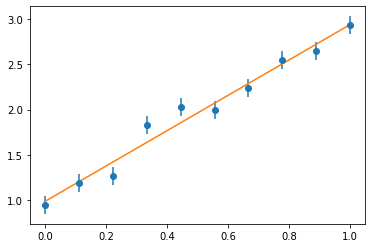

In [11]:
# get parameter values
a_fit = m.values["a"]  # m.values[0] also works
b_fit = m.values["b"]  # m.values[1] also works

plt.errorbar(x, y, sigma_y, fmt="o")
plt.plot(x, line(x, a_fit, b_fit));

In [12]:
# release fix on "a" and minimize again
m.fixed["a"] = False  # m.fixed[0] = False also works
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 10.39                      │              Nfcn = 89               │
│ EDM = 7.94e-16 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.99    │   0.06    │            │            │    0    │   10    │       │
│ 1 │ b    │   1.94    │   0.10    │            │            │    0    │   10    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │  0.00345 -0.00491 │
│ b │ -0.00491  0.00982 │
└───┴───────────────────┘

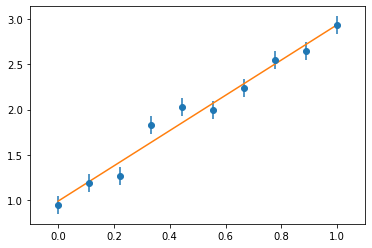

In [13]:
# get better parameter values
a_fit = m.values["a"]
b_fit = m.values["b"]

plt.errorbar(x, y, sigma_y, fmt="o")
plt.plot(x, line(x, a_fit, b_fit))
plt.xlim(-0.1, 1.1);

Ajuste de modelo com número flexível de parâmetros:



*   Modelo com número maior ou variável de parâmetros.


In [14]:
def LSQ_numpy(a, b, c, d):  # par is numpy array here  
    par = [a, b, c, d] 
    ym = np.polyval(par, x)  # for len(par) == 2 this is a line 
    return np.sum((y - ym) ** 2 / sigma_y ** 2)

In [15]:
m = Minuit(LSQ_numpy, a = 1., b = 1., c = 1., d = 1.)

In [16]:
m.migrad()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  """Entry point for launching an IPython kernel.


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.033                      │              Nfcn = 96               │
│ EDM = 8.56e-20 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    0.8    │    1.3    │            │            │         │         │       │
│ 1 │ b    │   -1.5    │    2.0    │            │            │         │         │       │
│ 2 │ c    │    2.7    │    0.8    │            │            │         │         │       │
│ 3 │ d    │   0.91    │   0.09    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────┐
│   │       a       b       c       d │
├───┼─────────────────────────────────┤
│ a │    1.72   -2.58   0.979 -0.0595 │
│ b │   -2.58       4   -1.59   0.108 │
│ c │   0.979   -1.59   0.691 -0.0572 │
│ d │ -0.0595   0.108 -0.0572 0.00824 │
└───┴─────────────────────────────────┘

In [17]:
m.values

<ValueView a=0.7654754973599222 b=-1.5030492741091694 c=2.735440243275514 d=0.911937259682182>

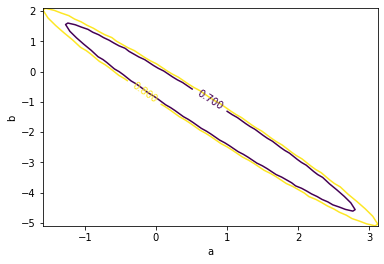

In [18]:
m.draw_mncontour('a','b', cl=[0.7, 0.8]);

In [19]:
# check reduced chi2, goodness-of-fit estimate, should be around 1
m.fval / (len(y) - len(m.values))

1.5055320143296285

A função a ser minimizada é a dispersão de velocidades, já com a inserção dos termos oriundos da gravidade modificada.

$\sigma^2 = \frac{G \kappa r^{2 - \beta}}{\xi - 2\beta} - \frac{G Y_1 \kappa (3-\alpha)(2-\alpha) r^{2 - \alpha}}{4 (2\beta - \xi)} $

em que:
$\kappa = \frac{2 M_E}{\sqrt{\pi} \lambda(\alpha) R_E ^{3-\alpha}} $,

$M_E$ é a massa de um cilindro com raio igual ao raio de Einstein $\theta_E$ e $R_E = D_l \theta_E$,

$\lambda(x) = \Gamma(\frac{x-1}{2})/ \Gamma(\frac{x}{2})$,

$\xi = \delta + \alpha - 2$.

Os parâmetros $\alpha$ e $\delta$ são as potências das expressões de densidade de massa e densidade de luminosidade, respectivamente.
Já $\beta$ é definido da seguinte forma:
$\beta(r) = 1 - \frac{\sigma_t ^2}{\sigma_r ^2}$.

Porém, consideraremos que $\beta$ é constante.

Logo, os parâmetros presentes na função que queremos minimizar são: $\alpha$, $\delta$, $\beta$ e $\theta_E$.

In [33]:
#alpha é a
#Raio de Einstein é b (definido assim pra ficar em acordo com a forma que é chamado nos dados)
#delta é c
#beta é d
#xi é e

#Definindo as constantes:
g = 6.67430*((10)**(-11))

def LSQ_numpy(a, b, c, d):  # par is numpy array here  
    par = [a, b, c, d] 
    ym = sigma2 = (g*k*r**(2-d))/(e-2*d) - (g*y*k*(3-a)*(2-a)*r**(2-a))/(4*(2*d - e))
    return np.sum((y - ym) ** 2 / sigma_sigma ** 2)

In [34]:
import pandas as pd

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
lenses_DESc = pd.read_csv("/content/drive/MyDrive/lenses_DESc.txt",
                          sep=' ',
                          comment='#',
                          names=['id', 'zl', 'zs', 'b', 'sig_v', 'ql', 'rl', 'lens_g', 'lens_r', 'lens_i', 'xs', 'ys', 'qs', 'ps', 'rs', 'source_g', 'source_r', 'source_i', 'mu_s', 'g_band_coadd_seeing', 'g_band_coadd_signal_to_noise', 'r_band_coadd_seeing', 'r_band_coadd_signal_to_noise', 'i_band_coadd_seeing'])

In [ ]:
#Testando operações com os dados
lenses_DESc["zs"]/lenses_DESc["zl"]

In [38]:
(lenses_DESc["sig_v"])**2

0         70284.372544
1         70047.562225
2        101491.942084
3         66091.154724
4         58884.360921
             ...      
18593     57210.420969
18594    105483.347524
18595     80496.470961
18596     57259.704100
18597     62282.689225
Name: sig_v, Length: 18598, dtype: float64

In [39]:
lista1 = (lenses_DESc["sig_v"])**2

Criando uma nova coluna:

In [40]:
lenses_DESc["sig2"] = lista1

In [41]:
m1 = Minuit(LSQ_numpy, a = 1., b = 1.497, c = 1., d = 1.)

In [42]:
m1.migrad()

NameError: ignored